In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("Daily_Demand_Forecasting_Orders.csv",delimiter=';')
dataset

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [4]:
X = dataset.drop(columns=["Target (Total orders)"])
y = dataset["Target (Total orders)"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
regression_model = Sequential([
    Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(64, activation='relu'),
    Dense(1)
])

# MEAN SQUARED ERROR

In [7]:
regression_model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
history = regression_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/100

2/2 [==============================] - 1s 197ms/step - loss: 90125.4375 - val_loss: 130957.2734
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 90003.3203 - val_loss: 130774.2109
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 89875.6484 - val_loss: 130594.2500
Epoch 4/100
2/2 [==============================] - 0s 32ms/step - loss: 89756.4688 - val_loss: 130410.6484
Epoch 5/100
2/2 [==============================] - 0s 48ms/step - loss: 89636.2266 - val_loss: 130226.4297
Epoch 6/100
2/2 [==============================] - 0s 51ms/step - loss: 89509.9766 - val_loss: 130038.0000
Epoch 7/100
2/2 [==============================] - 0s 68ms/step - loss: 89379.0938 - val_loss: 129849.1484
Epoch 8/100
2/2 [==============================] - 0s 29ms/step - loss: 89251.0859 - val_loss: 129652.8672
Epoch 9/100
2/2 [==============================] - 0s 32ms/step - loss: 89117.0234 - val_loss: 129450.2109
Epoch 10/100
2/2 [=================

In [9]:
train_loss = regression_model.evaluate(X_train_scaled, y_train)
print("Training Loss:", train_loss)

2/2 [==============================] - 0s 4ms/step - loss: 16632.4297
Training Loss: 16632.4296875


In [10]:
test_loss = regression_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

1/1 [==============================] - 0s 32ms/step - loss: 25205.9375
Test Loss: 25205.9375


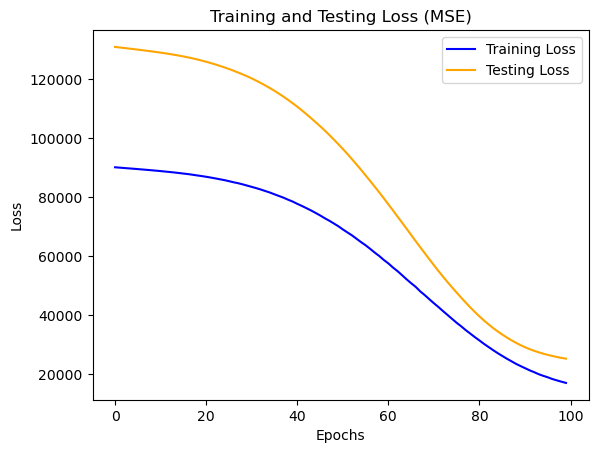

In [11]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MEAN ABSOLUTE ERROR

In [12]:
regression_model.compile(optimizer='adam', loss='mean_absolute_error')

In [13]:
history = regression_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 137ms/step - loss: 115.4750 - val_loss: 137.6910
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 113.2978 - val_loss: 136.7698
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 111.1657 - val_loss: 135.9122
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 109.5393 - val_loss: 135.0674
Epoch 5/100
2/2 [==============================] - 0s 38ms/step - loss: 107.4823 - val_loss: 134.1546
Epoch 6/100
2/2 [==============================] - 0s 31ms/step - loss: 105.9405 - val_loss: 133.2786
Epoch 7/100
2/2 [==============================] - 0s 31ms/step - loss: 104.2303 - val_loss: 132.3622
Epoch 8/100
2/2 [==============================] - 0s 32ms/step - loss: 102.2380 - val_loss: 131.4825
Epoch 9/100
2/2 [==============================] - 0s 47ms/step - loss: 100.8888 - val_loss: 130.6077
Epoch 10/100
2/2 [==============================] - 0s 42ms/step - loss: 99.3555 

In [14]:
train_loss = regression_model.evaluate(X_train_scaled, y_train)
print("Training Loss:", train_loss)

2/2 [==============================] - 0s 0s/step - loss: 52.5204
Training Loss: 52.52035903930664


In [15]:
test_loss = regression_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

1/1 [==============================] - 0s 31ms/step - loss: 90.2197
Test Loss: 90.21965789794922


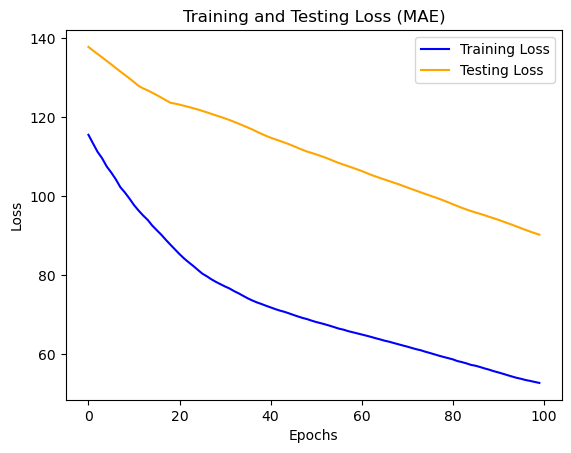

In [16]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss (MAE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()